# Distribution Plots

In [2]:
import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


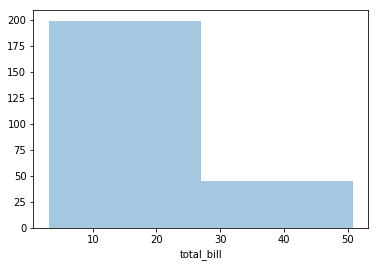

In [16]:
#Can see distribution of univariates 
#Univariate means one variable 

sns.distplot(tips['total_bill'], kde=False, bins = 2)
#KDE is a kernel density estimation, the line over your graph i.e. 
#KDE = false makes it go away
#Bin values help see more or less granularity
#Balanced Bin size depends on the plot itself

C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


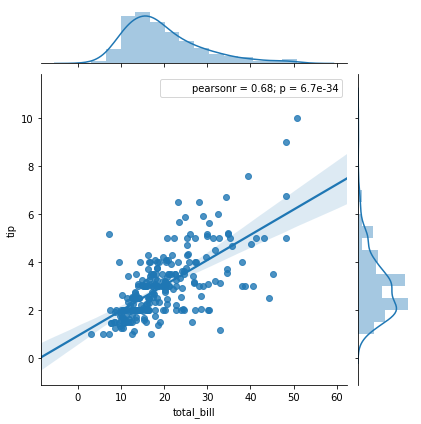

In [23]:
#sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') 
#Can let you match up two univariate plots and get bivariate
#Kind variable allows you to show how you compare distributions
#Kind arguments...'hex','reg','kde'
sns.jointplot(x='total_bill',y='tip',data=tips,kind ='reg')


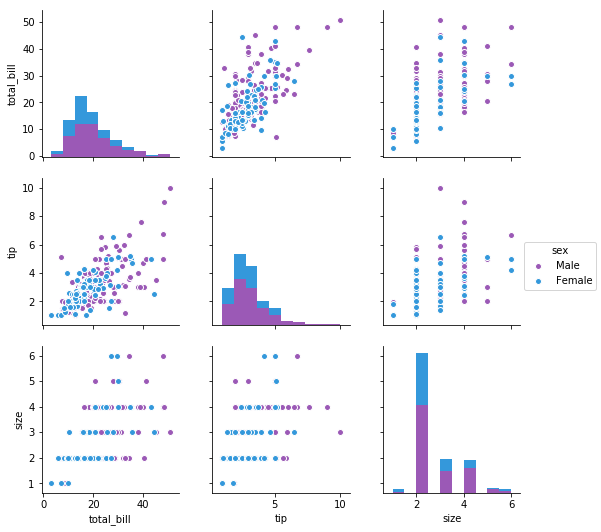

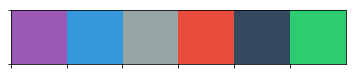

In [28]:
sns.pairplot(tips,hue='sex',kind='scatter', palette=flatui)
#plots pairwise relationships across the data set and supports color themes
#pairplot will do joint plot for all possible combinations

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

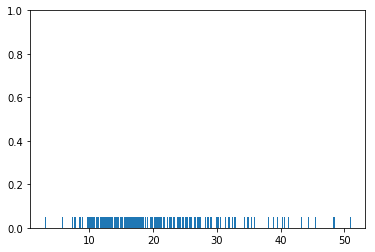

In [24]:
sns.rugplot(tips['total_bill'])
#Draws a dash mark for every point on this univariate distribution
#Does not bin like distplot

(0, 1)

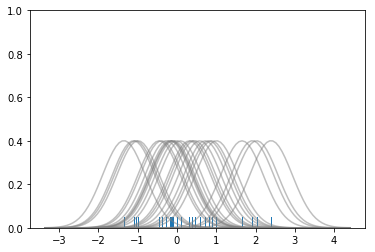

In [32]:
#KDE plots stand for kernel density estimation plots
#Gaussian distribution normal distribution 
#represent real valued random variables whose distributons are not known
#Exampple use peoples ages or heights
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

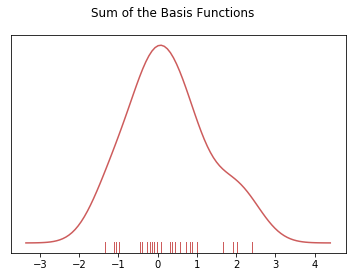

In [33]:
#Going to sum up the distributons to get a KDE
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [28]:
#Sum of basis functions is how the KDE plots are created

# Categorical Plots

In [32]:
#Used to see distributions of categorical columns vs. numerical 
#E.g. Sex = Categories M and F vs. Numerical like Tip or Bill 

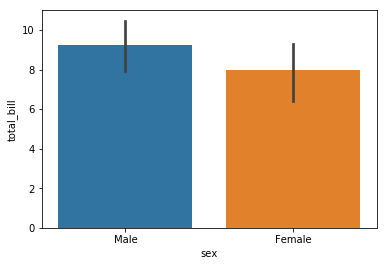

In [38]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
#Showing you the average total bill for Male and Female
#For estimator you can change it from looking at average and look at 
#standard deviation for example...make sure you import numpy 


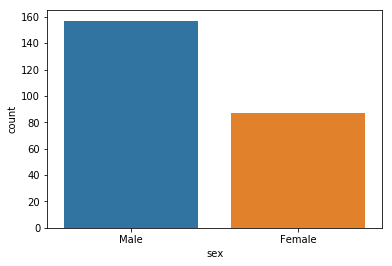

In [39]:
sns.countplot(x='sex',data=tips)
#This is like counting occurences in pandas, more males than females 
#in the dataset

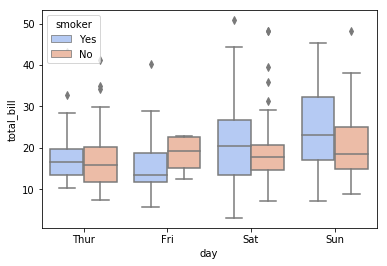

In [43]:
#Box and Violin Plots are used to show distribution of categorical data
#Box plot shows distribution of quant data in a way that facilitates
#comparison between variables 

sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker', palette='coolwarm')
#points outside of whiskers are outliers
#Quartiles are between the whiskers, 50% are the middle colored plots
#Then you can add another variable in the hue argument

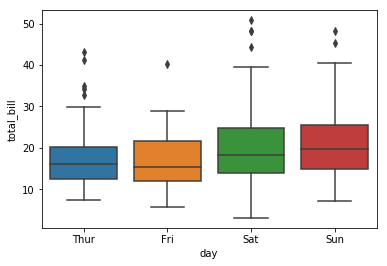

In [42]:
sns.boxplot(x='day',y='total_bill',data=tips)

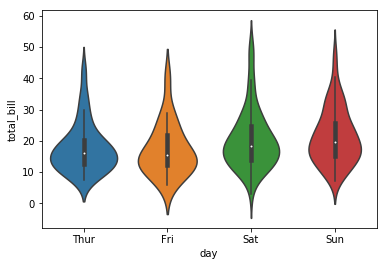

In [44]:
sns.violinplot(x='day',y='total_bill',data=tips)
#The violin plot allows us to plot the kernel density estimation on 
#its side. The cost comes that its a little harder to intepret and read
#Distribution of points themselves are more evident 

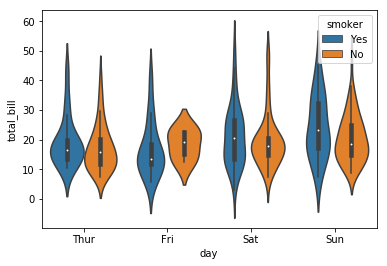

In [45]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker')

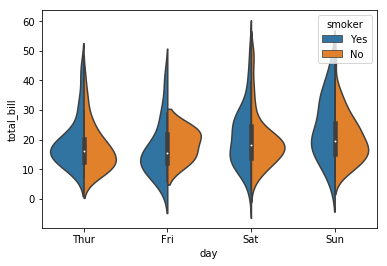

In [48]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker', split = True)
#You can make one half be one hue and the other half the other.

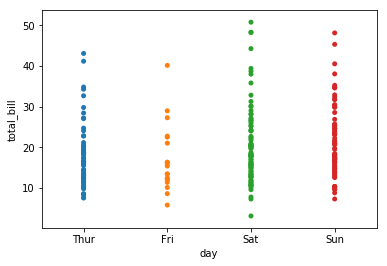

In [48]:
sns.stripplot(x='day',y='total_bill',data=tips)

C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


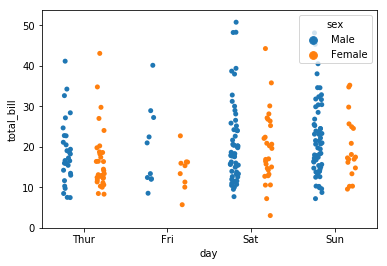

In [49]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)
#Problems with strip plots are that you can't tell how many points 
#are stacked on top of eachother. Therefore it adds random noise 
#so you can see stacked points

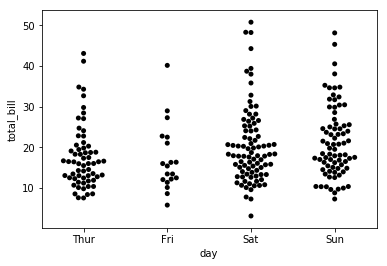

In [51]:
#Swarm plots are like strip plots but points are adjusted to
#they dont overlap
sns.swarmplot(x='day',y='total_bill',data=tips, color = 'black')
#sns.violinplot(x='day',y='total_bill',data=tips)

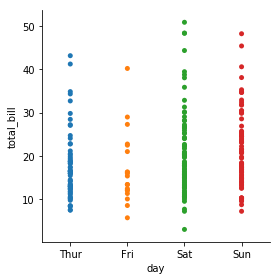

In [50]:
#Factor Plot, most general form 
sns.factorplot(x='day',y='total_bill',data=tips,kind = 'strip')

# Matrix Plots

In [52]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [53]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
#Index Name and Column Names need to match up across datasets
#Tips Dataframe needs to be modified to put variable on column or rows
#Try correlation method first 
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


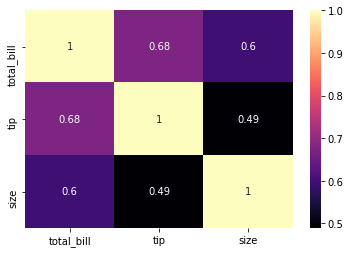

In [60]:
sns.heatmap(tc,annot=True,cmap='magma')

In [64]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

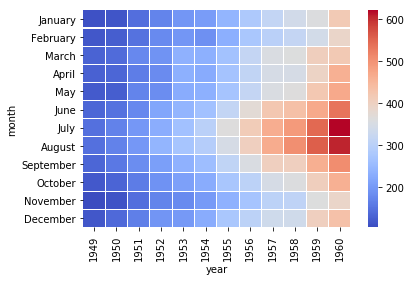

In [67]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=.05)

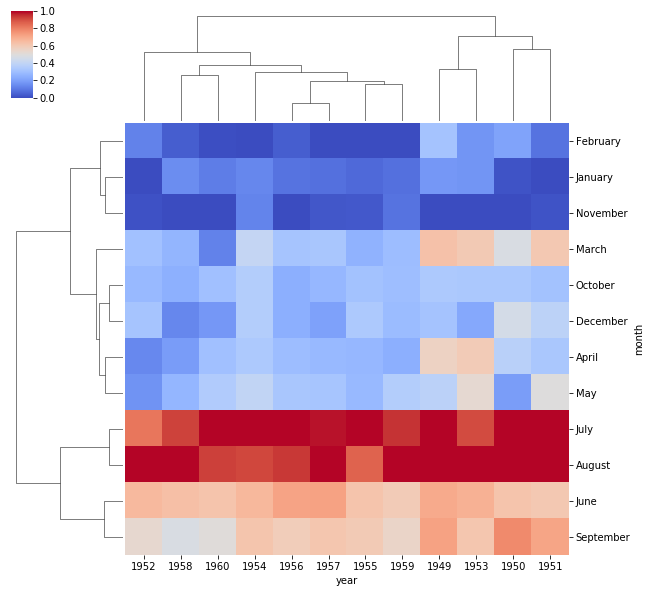

In [69]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

# Grids

In [70]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

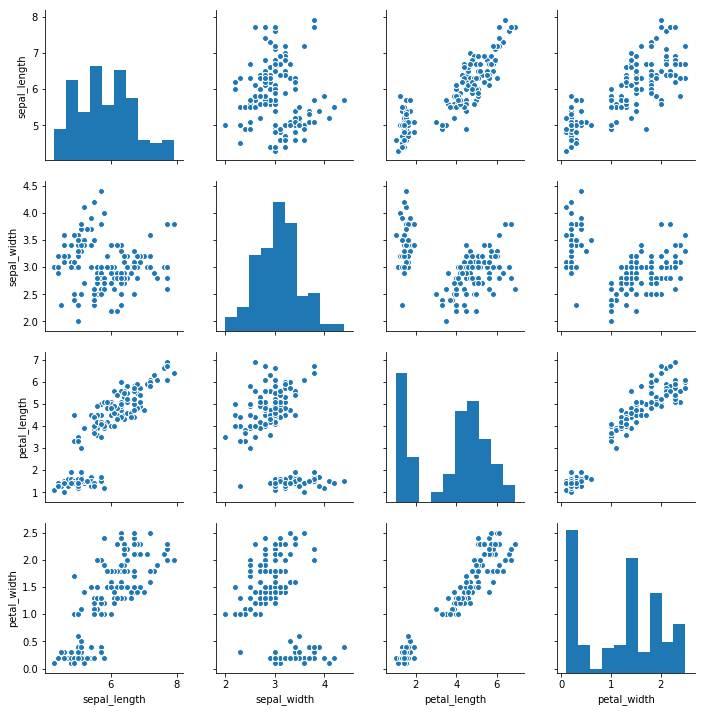

In [74]:
sns.pairplot(iris)

C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


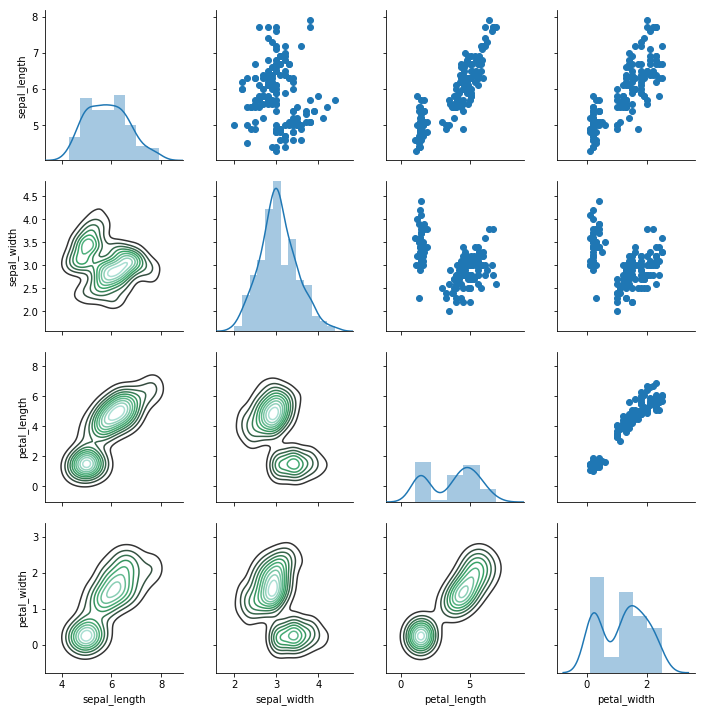

In [77]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [78]:
tips = sns.load_dataset('tips')

C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


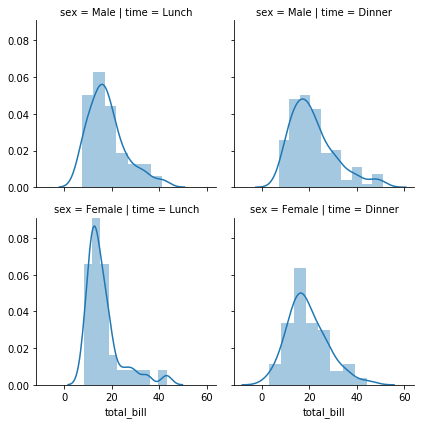

In [80]:
#facet grid
g = sns.FacetGrid(data=tips,col='time',row='sex')
g.map(sns.distplot,'total_bill')

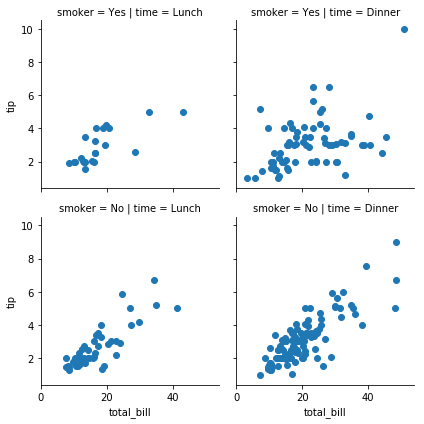

In [108]:
#facet grid
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

# Regression Plots

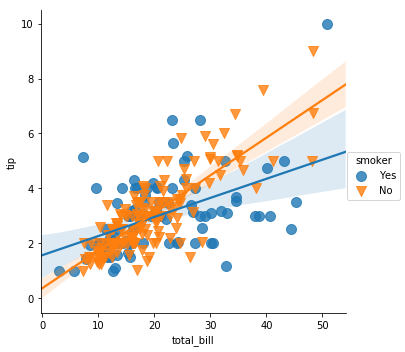

In [85]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',
           markers=['o','v'],scatter_kws={'s':100})

#Scatter_kws is changing things under the hood in matplotlib not SB
#to change the marker sizing


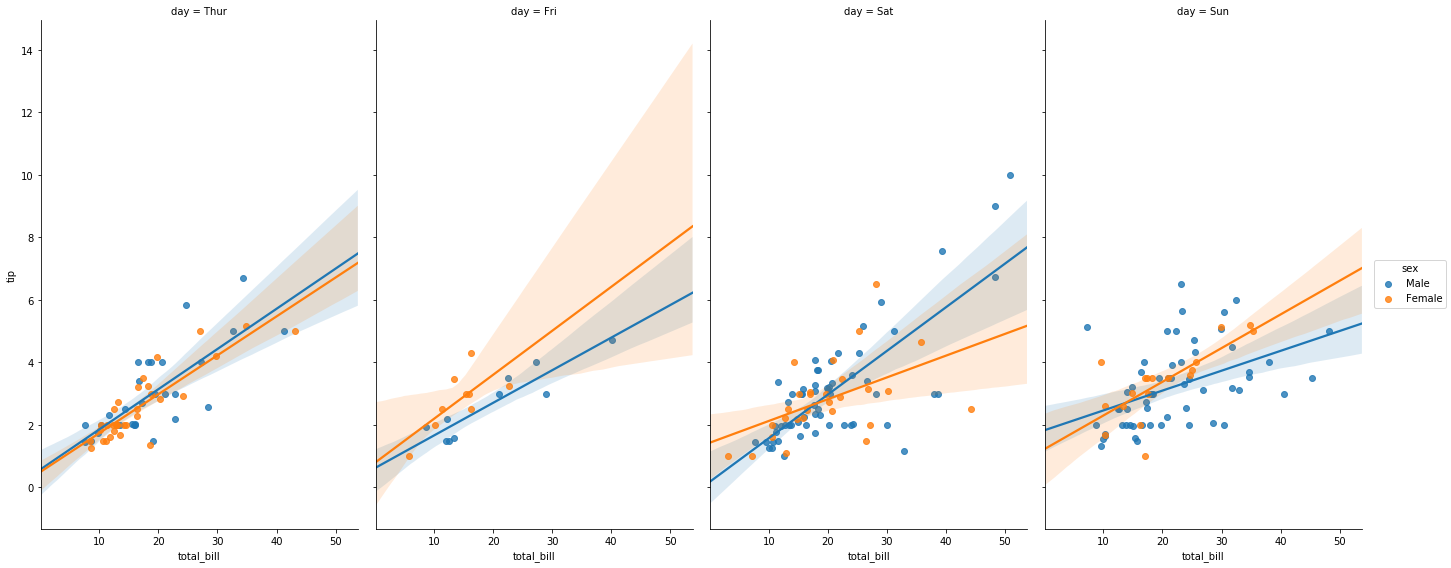

In [91]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8)

# Style & Color

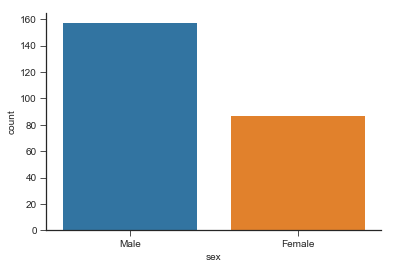

In [102]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

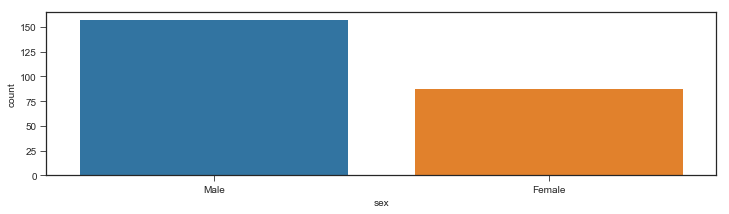

In [110]:
#Size and aspect ratios, fig size etc
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)


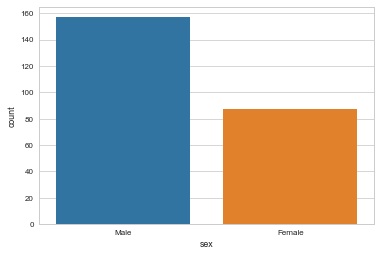

In [131]:
sns.set_context('paper',font_scale=1)
sns.countplot(x='sex',data=tips)

#Palettes and Colors

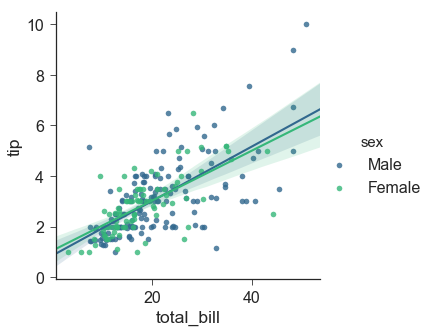

In [123]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='viridis')

## Seaborn Exercises

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1)

In [129]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


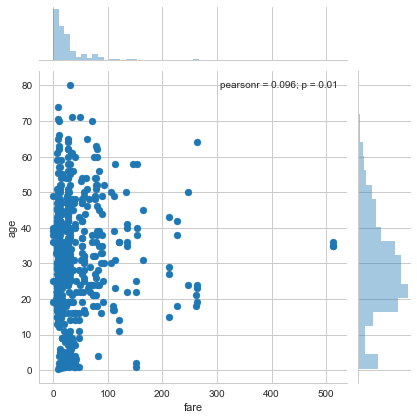

In [134]:
sns.jointplot(x='fare',y='age',data=titanic)

C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


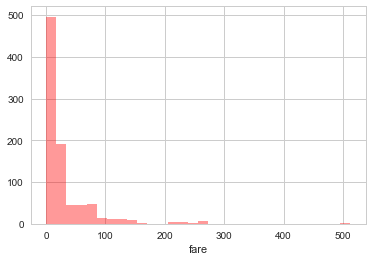

In [177]:
sns.distplot(titanic['fare'],bins=30,kde=False,color='red')

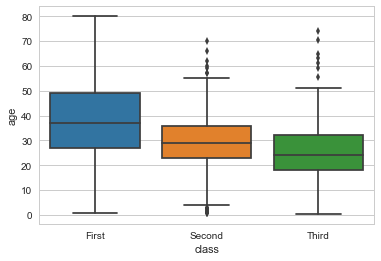

In [150]:
sns.boxplot(x='class',y='age',data=titanic)

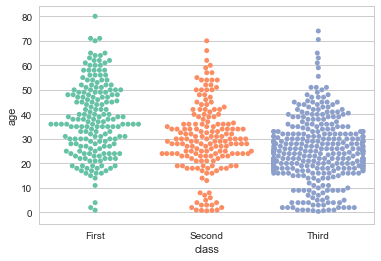

In [178]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

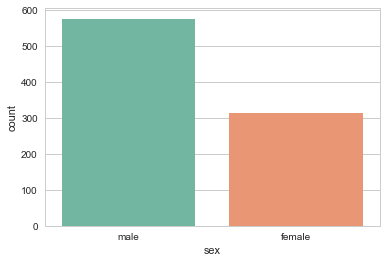

In [179]:
sns.countplot(x='sex', data=titanic,palette='Set2')

In [153]:
tc = titanic.corr()

In [154]:
tc

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


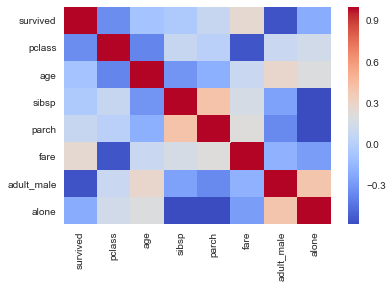

In [157]:
sns.heatmap(tc,cmap='coolwarm')

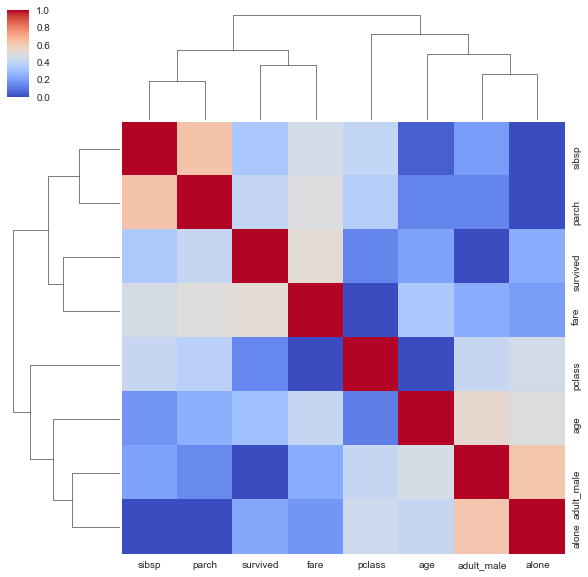

In [159]:
sns.clustermap(tc,cmap='coolwarm',standard_scale=1)

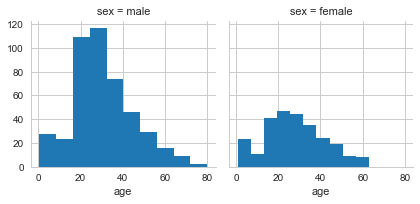

In [184]:
h= sns.FacetGrid(data=titanic,col='sex')
h.map(plt.hist,'age')

#facet grid
#g = sns.FacetGrid(data=tips,col='time',row='sex')
#g.map(sns.distplot,'total_bill')